<a href="https://colab.research.google.com/github/anurag1517/House_Price_Prediction/blob/main/housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
housing = pd.read_csv("/content/housing.csv")

In [9]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
housing.shape

(506, 14)

In [11]:
#Just to have a concise summary of df.
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [12]:
#correlation_matrix to check correlation with the label,i.e,'MEDV'.
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.696169
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [13]:
#calculated median of RM as there were some null values.
column_RM=housing['RM']
RM_Median=column_RM.median()
print(RM_Median)


6.208


In [14]:
#filled null values with median of the column.
column_RM.fillna(RM_Median,inplace=True)

In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

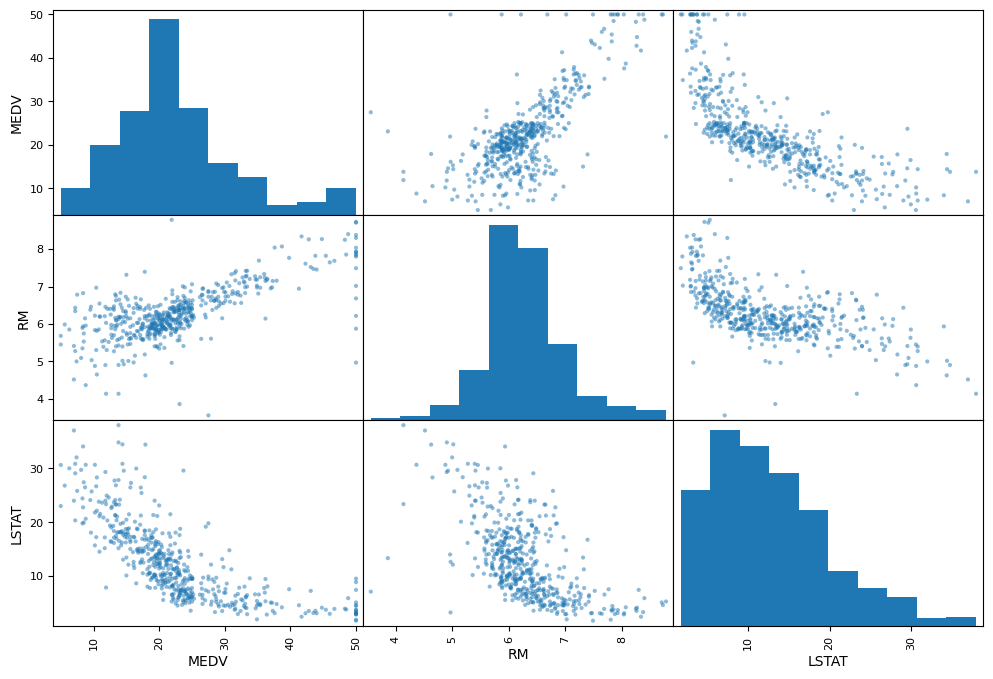

In [16]:
#analysed plots of features which are highly correlated with the label'MEDV'.
from pandas.plotting import scatter_matrix
features=['MEDV','RM', 'LSTAT']
scatter_matrix(housing[features], figsize=(12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

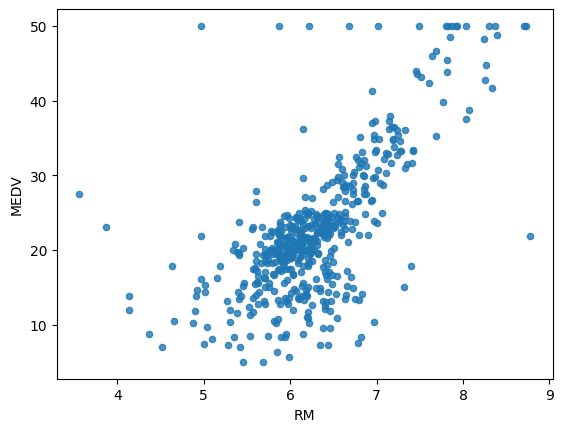

In [17]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

In [18]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283587,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702126,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
#spliting data into training set for model training and test set for model testing.
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [20]:
#'CHAS' contains only 0 and 1 so it should be splitted in equal ratio.
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
  strat_train_set=housing.loc[train_index]
  strat_test_set=housing.loc[test_index]

In [21]:
# number of examples in training set
len(strat_train_set)

404

In [22]:
#number of examples in test set.
len(strat_test_set)

102

In [23]:
# segregating labels from examples.
drop_labels_train=strat_train_set.drop('MEDV',axis=1)
labels=strat_train_set['MEDV']
drop_labels_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 254 to 216
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 44.2 KB


In [24]:
#creating a series of actions to be done on a dataframe before fitting it into a model.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

In [25]:
housing_after_pipeline=my_pipeline.fit_transform(drop_labels_train)

In [26]:
#dataset ready for fitting into model.
train_fit=housing_after_pipeline

In [27]:
train_fit.shape

(404, 13)

In [28]:
#fitting the train_fit array into model.
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(train_fit,labels)

LinearRegression()

In [29]:
#checking model prediction on some data from training set.
some_data=drop_labels_train.iloc[:5]
some_labels=labels.iloc[:5]
prepared_data=my_pipeline.fit_transform(some_data)

In [30]:
predictions=model.predict(prepared_data)
list(predictions)

[20.93698704553735,
 28.81407741040372,
 15.007841707446552,
 24.730608397963405,
 23.057515141619103]

In [31]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [32]:
from sklearn.metrics import r2_score
r2_score(predictions,some_labels)

0.7583679972575379

In [33]:
#evaluating the model
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(train_fit)
mse=mean_squared_error(labels,housing_predictions)
rmse=np.sqrt(mse)


In [34]:
rmse

4.835286458478928

In [35]:
#scaling and filling null values of test test
test_set_after_pipeline=my_pipeline.fit_transform(strat_test_set)

In [36]:
#segregating labels and other attributes
test_set_without_labels=strat_test_set.drop('MEDV',axis=1)
labels=strat_test_set['MEDV']

In [37]:
test_set_without_labels_pipelne=my_pipeline.fit_transform(test_set_without_labels)

In [38]:
test_set_prediction=model.predict(test_set_without_labels_pipelne)

In [39]:
test_set_prediction

array([22.1522826 , 16.50614032, 29.7108448 , 30.11609268,  7.36133736,
       11.89260547, 16.47532036, 17.05163545, 31.28236502, 36.05715355,
       15.34574749, -1.42225898, 22.5687819 , 19.61510002, 19.65697986,
       11.75438593, 30.27663165, 12.01030755, 24.85762913, 23.13764376,
       19.96938015, 16.22833669, 18.54023563, 24.89470523, 17.74687014,
       32.42468253, 18.6474833 , 33.44159967,  6.62955803, 33.76512708,
       18.31253386, 20.96736733, 28.76633093, 15.69430199, 25.69038865,
       17.71240125, 36.58329856, 24.23509751, 22.13170202, 36.58296865,
       24.73487166, 33.56135811, 22.88018527, 23.40740168, 17.78504762,
       32.31294938, 38.82787612, 21.05049732, 16.68676846, 15.72875737,
       20.53252122, 11.3823907 , 19.01820308, 19.60490792, 27.61616816,
       33.09738534, 40.46577996, 30.62772324, 13.96588615, 19.45997206,
       39.99774217, 17.43908851, 14.49850449, 27.12670903, 18.82730133,
       32.52781099, 21.62942529, 19.75112777, 19.75847556, 33.44

In [40]:
list(labels)

[16.5,
 10.2,
 30.1,
 23.0,
 14.4,
 15.6,
 19.4,
 14.1,
 30.3,
 35.2,
 23.1,
 13.8,
 25.0,
 27.9,
 19.5,
 12.3,
 32.2,
 13.5,
 23.8,
 21.7,
 19.2,
 19.5,
 10.4,
 23.2,
 18.6,
 28.5,
 15.2,
 32.0,
 7.2,
 34.6,
 20.1,
 20.6,
 23.6,
 13.1,
 23.8,
 12.7,
 43.1,
 24.7,
 22.2,
 44.0,
 28.1,
 31.0,
 21.7,
 23.4,
 19.5,
 33.1,
 41.7,
 18.7,
 19.9,
 20.6,
 21.2,
 13.6,
 20.3,
 17.8,
 27.1,
 31.5,
 50.0,
 29.1,
 18.9,
 20.4,
 50.0,
 7.2,
 17.2,
 36.2,
 14.6,
 33.2,
 23.8,
 19.9,
 21.5,
 37.3,
 27.0,
 22.0,
 24.3,
 19.8,
 33.3,
 7.0,
 19.4,
 20.9,
 21.1,
 20.4,
 22.2,
 11.9,
 11.7,
 21.6,
 19.7,
 23.0,
 16.7,
 21.7,
 20.6,
 23.3,
 19.6,
 28.0,
 5.0,
 24.4,
 20.8,
 24.8,
 21.8,
 23.6,
 19.0,
 25.0,
 20.3,
 21.5]

In [41]:
r2_score(test_set_prediction,labels)

0.7164638597288597

In [42]:
mse=mean_squared_error(labels,test_set_prediction)
rmse=np.sqrt(mse)
rmse

4.226944664479784

The rmse is better as compared to training set indicating a goodnes of fit.

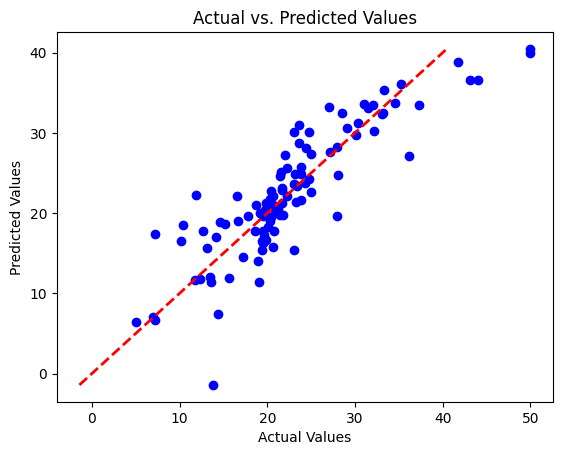

In [56]:
plt.scatter(labels,test_set_prediction,c='b')
#plt.plot(labels,np.dot(model.coef_,test_set_without_labels_pipelne)+model.intercept_)
predicted_values = np.dot(test_set_without_labels_pipelne, model.coef_) + model.intercept_
plt.plot([ predicted_values.min(),predicted_values.max()],[predicted_values.min(),predicted_values.max()],'r--',lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

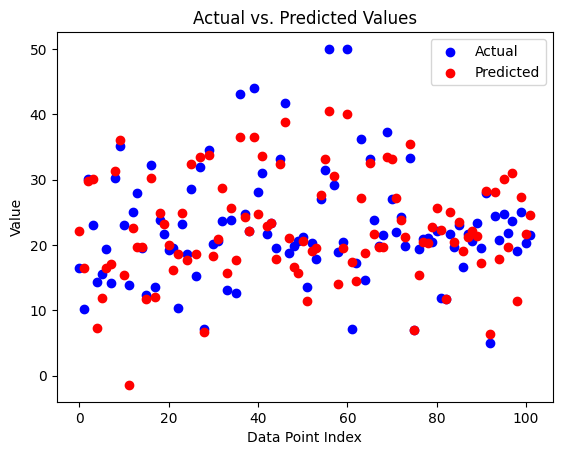

In [44]:
plt.scatter(range(len(labels)), labels, color='blue', label='Actual')
plt.scatter(range(len(test_set_prediction)), test_set_prediction, color='red', label='Predicted')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

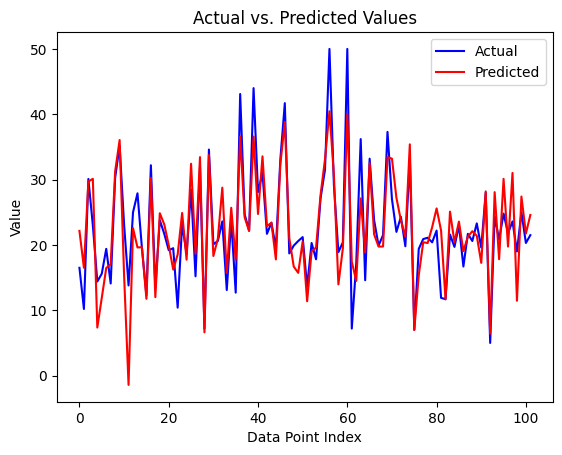

In [45]:
plt.plot(range(len(labels)), labels, color='blue', label='Actual')
plt.plot(range(len(test_set_prediction)), test_set_prediction, color='red', label='Predicted')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [46]:
#weight and bias for respective features.
weight=model.coef_
bias=model.intercept_
print(weight)
print(bias)

[-0.5402039   0.81890791  0.26171918  0.83970774 -2.14783289  2.68607555
  0.25580417 -2.87882489  2.44104626 -1.86301534 -2.1307386   1.02946341
 -4.09245966]
22.509405940594053


In [47]:

from joblib import dump,load
dump(model,'model.joblib')

['model.joblib']

In [48]:
from joblib import dump,load
model=load('model.joblib')

In [49]:
prepared_data

array([[-0.54613254,  1.22474487, -0.72437731,  0.        , -1.24995952,
        -1.56482553, -0.63315717,  1.28708093, -0.8260802 , -0.34670673,
        -1.39707095, -0.77512458, -0.46346653],
       [-0.56362787,  1.22474487, -1.01505555,  0.        , -0.67449636,
         1.43394921, -0.72591268,  0.94059017, -0.46163305, -0.58006703,
        -1.00899568, -1.57996639, -0.58126258],
       [ 1.99708026, -0.81649658,  1.85427751,  0.        ,  1.72103634,
         0.57471774,  1.85107734, -1.44712384,  1.9680146 ,  1.99356371,
         1.06073905,  0.5951702 ,  1.99603376],
       [-0.47579269, -0.81649658, -0.05742233,  0.        ,  0.10170977,
        -0.03983192,  0.26616798, -0.56336085, -0.34015067, -0.53339497,
         0.67266379,  0.87996038, -0.40253754],
       [-0.41152716, -0.81649658, -0.05742233,  0.        ,  0.10170977,
        -0.4040095 , -0.75817547, -0.21718641, -0.34015067, -0.53339497,
         0.67266379,  0.87996038, -0.54876712]])

In [50]:
features=np.array([[-0.54613254,  1.22474487, -0.72437731,  0., -1.24995952,
        -1.56482553, -0.63315717,  1.28708093, -0.8260802 , -0.34670673,
        -1.39707095, -0.77512458, -0.4634665]])
model.predict(features)

array([20.93698693])

In [51]:
some_data=drop_labels_train.iloc[:5]
print(some_data.iloc[0])

CRIM         0.04819
ZN          80.00000
INDUS        3.64000
CHAS         0.00000
NOX          0.39200
RM           6.10800
AGE         32.00000
DIS          9.22030
RAD          1.00000
TAX        315.00000
PTRATIO     16.40000
B          392.89000
LSTAT        6.57000
Name: 254, dtype: float64


In [52]:
#using model to predict on any given data
#price_prediction for different feature value can be calculated.
"""
features=[]
num_features=13
for i in range(num_features):
  features.append(float(input()))

feature_pipelined=my_pipeline.fit_transform([features])
model.predict(feature_pipelined)

"""


'\nfeatures=[]\nnum_features=13\nfor i in range(num_features):\n  features.append(float(input()))\n\nfeature_pipelined=my_pipeline.fit_transform([features])\nmodel.predict(feature_pipelined)\n\n'